In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [8]:
df = pd.read_csv('data/SMA_data.csv', parse_dates=['Datetime'])
df.set_index('Datetime', inplace=True)
df.isnull().sum()

SMA    0
dtype: int64

### Feature Engineering


In [9]:
df['SMA_diff'] = df['SMA'].diff().fillna(0)
df['SMA_ma_5'] = df['SMA'].rolling(window=5).mean().fillna(df['SMA'])

In [10]:
np.random.seed(42)
df['maneuver'] = np.random.randint(0, 2, size=len(df))

In [11]:
x = df[['SMA', 'SMA_diff', 'SMA_ma_5']]
y = df['maneuver']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
preprocess = ColumnTransformer(
transformers=[
            ('num', Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='mean')),
                ('scaler', StandardScaler())
            ]), ['SMA', 'SMA_diff', 'SMA_ma_5'])
        ]
    )

In [14]:
model_pipeline = Pipeline(steps=[
        ('preprocess', preprocess),
        ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

In [15]:
 model_pipeline.fit(X_train, y_train)

    # Make predictions
df['predictions'] = model_pipeline.predict(x)
y_pred = df['predictions']

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1170
           1       0.84      0.84      0.84      1121

    accuracy                           0.84      2291
   macro avg       0.84      0.84      0.84      2291
weighted avg       0.84      0.84      0.84      2291

Accuracy Score: 0.8446093408991706


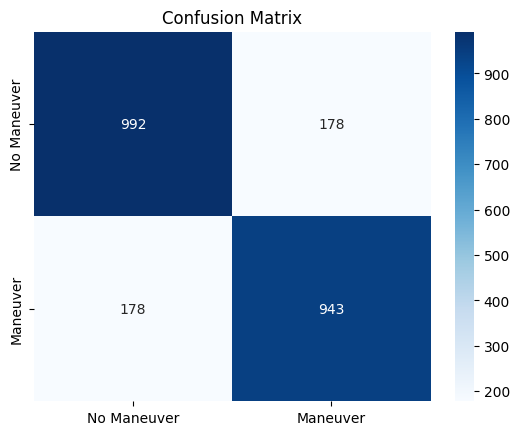

In [16]:
print("Classification Report:\n", classification_report(y, y_pred))
print("Accuracy Score:", accuracy_score(y, y_pred)) 
conf_matrix = confusion_matrix(y, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Maneuver', 'Maneuver'], yticklabels=['No Maneuver', 'Maneuver'])
plt.title('Confusion Matrix')
plt.show()

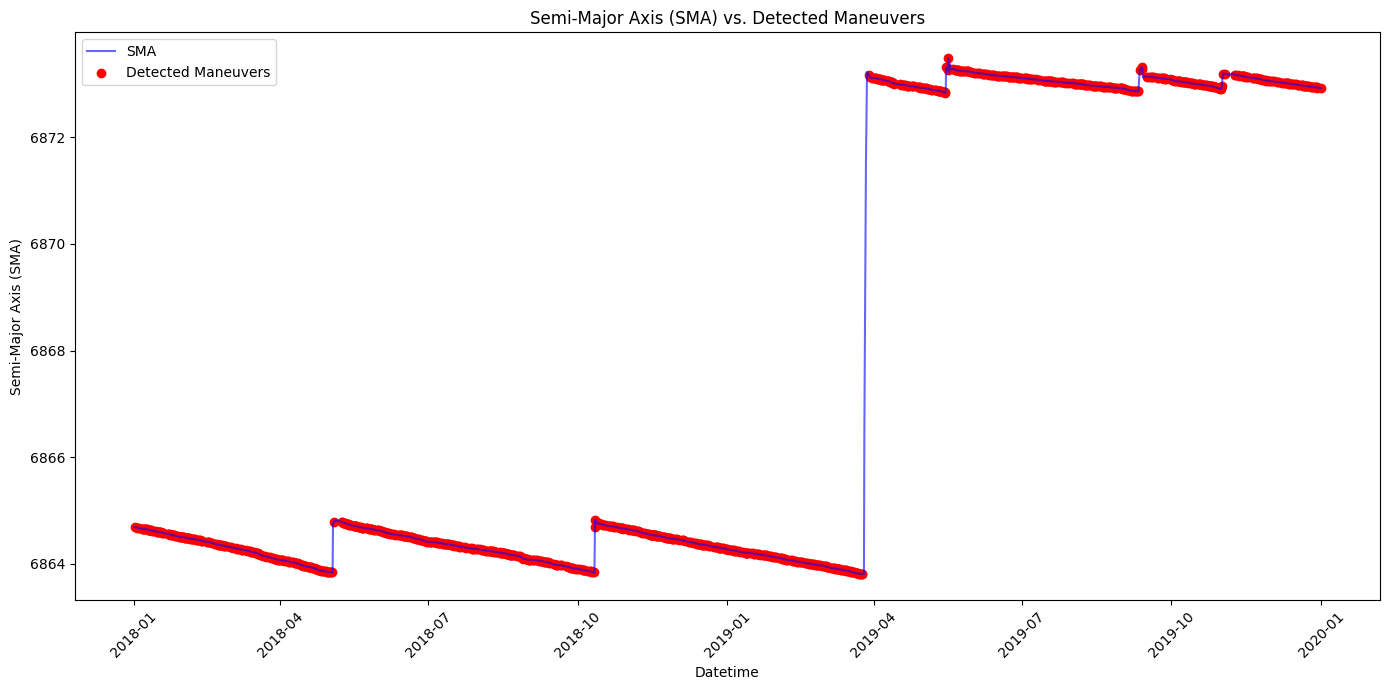

In [18]:
    maneuver_data = df[df['maneuver'] == 1]
    
    plt.figure(figsize=(14, 7))
    
    # Line plot for SMA with maneuvers
    plt.plot(df.index, df['SMA'], label='SMA', color='blue', alpha=0.6)
    plt.scatter(maneuver_data.index, maneuver_data['SMA'], color='red', label='Detected Maneuvers', marker='o')
    
    plt.xlabel('Datetime')
    plt.ylabel('Semi-Major Axis (SMA)')
    plt.title('Semi-Major Axis (SMA) vs. Detected Maneuvers')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
